### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [307]:
data = pd.read_csv('data/coupons.csv')

In [308]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [309]:
# Missing values summary
missing_summary = data.isnull().sum()
missing_percentage = (missing_summary / len(data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

print(missing_df)

                      Missing Values  Percentage (%)
car                            12576       99.148534
CoffeeHouse                      217        1.710817
Restaurant20To50                 189        1.490066
CarryAway                        151        1.190476
RestaurantLessThan20             130        1.024913
Bar                              107        0.843582


3. Decide what to do about your missing data -- drop, replace, other...

In [310]:
# From the missing summary analysis,
# - `car` column has more thant 99% of its values missing - no value in retaining.
# - Other columns seem to be categorical in nature and we will use the `mode` to preserve underlying characteristic

categorical_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

data = data.drop(columns='car')

for col in categorical_columns:
    mode_value = data[col].mode()[0]
    data.fillna({col: mode_value}, inplace=True)

4. What proportion of the total observations chose to accept the coupon?

In [311]:
acceptance_rate = round(data['Y'].mean()*100, 2)
print(f"Overall acceptance rate {acceptance_rate}%")

Overall acceptance rate 56.84%


Text(0.5, 1.0, 'Overall Coupon Acceptance Counts')

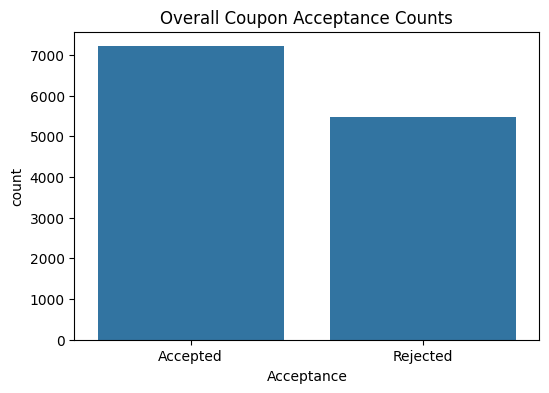

In [312]:
data['Acceptance'] = data['Y'].map({1: 'Accepted', 0: 'Rejected'})
plt.figure(figsize=(6,4))
sns.countplot(x='Acceptance', data=data)
plt.title('Overall Coupon Acceptance Counts')

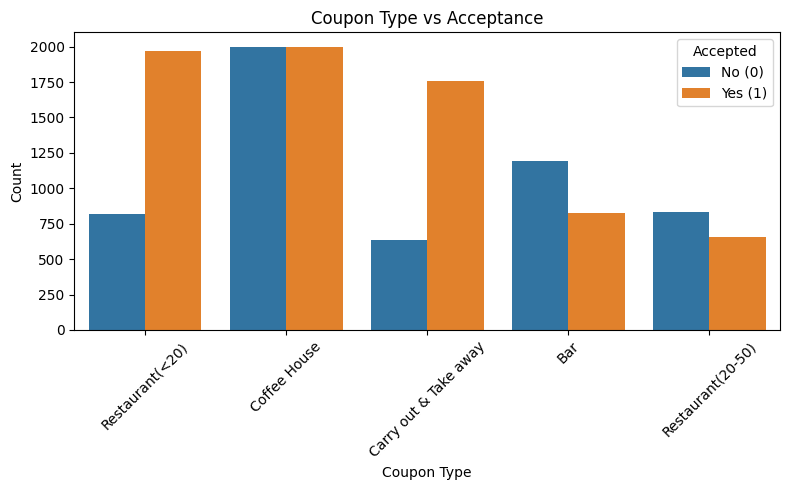

In [313]:
# Coupon Type vs Acceptance
plt.figure(figsize=(8, 5))
sns.countplot(x='coupon', hue='Y', data=data)
plt.title('Coupon Type vs Acceptance')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Use a bar plot to visualize the `coupon` column.

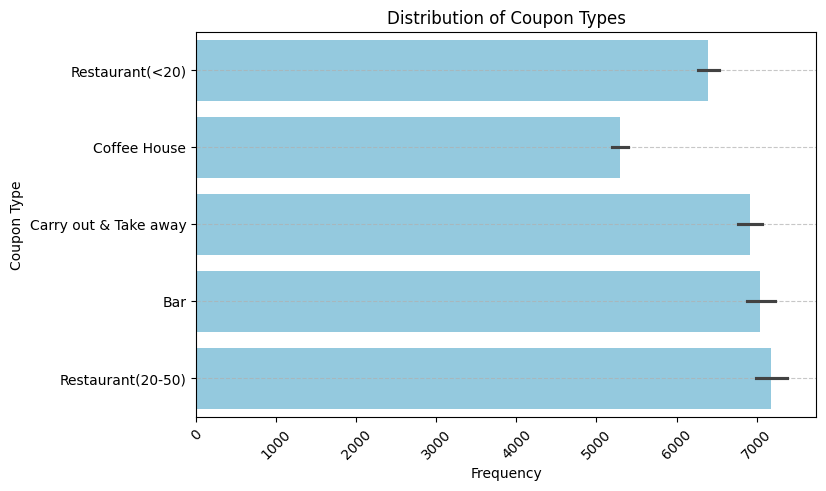

In [314]:
plt.figure(figsize=(8, 5))
sns.barplot(data['coupon'], color='skyblue')

plt.title('Distribution of Coupon Types')
plt.xlabel('Frequency')
plt.ylabel('Coupon Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

6. Use a histogram to visualize the temperature column.

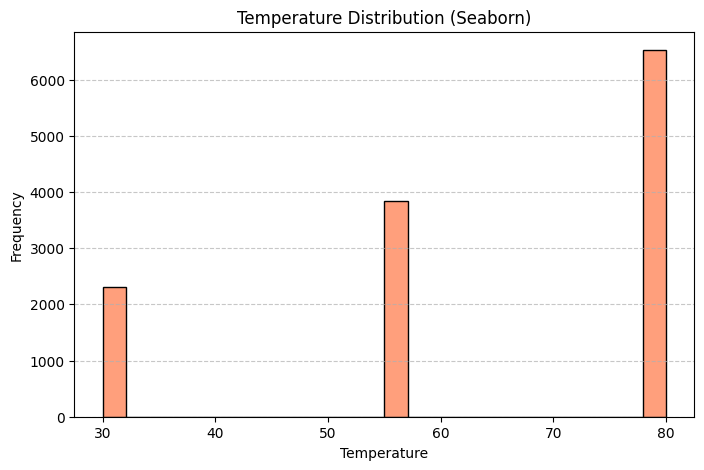

In [315]:
plt.figure(figsize=(8, 5))
sns.histplot(data['temperature'], kde=False, color='coral')

plt.title('Temperature Distribution (Seaborn)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [316]:
bar_coupon_data = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [317]:
bar_acceptance_rate = round(bar_coupon_data['Y'].mean()*100, 2)
print(f"Bar Coupon acceptance rate {bar_acceptance_rate}%")

Bar Coupon acceptance rate 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [318]:
less_equal_3_times = ['0', 'less1', '1~3']
more_than_3_times = ['4~8', 'gt8']

# Acceptance rate for users visiting bar 3 or fewer times
less_equal_3_acceptance_rate = bar_coupon_data[bar_coupon_data['Bar'].isin(less_equal_3_times)]['Y'].mean()
# Acceptance rate for users visiting bar more than 3 times
more_than_3_acceptance_rate = bar_coupon_data[bar_coupon_data['Bar'].isin(more_than_3_times)]['Y'].mean()
less_equal_3_acceptance_rate = np.round(less_equal_3_acceptance_rate*100, 2)
more_than_3_acceptance_rate = np.round(more_than_3_acceptance_rate*100, 2)

print("Acceptance rate for users visiting bar 3 or fewer times", less_equal_3_acceptance_rate, "%")
print("Acceptance rate for users visiting bar more than 3 times", more_than_3_acceptance_rate, "%")

print("""\nData indicates a slightly higher acceptance rate among users who frequently visit bars (>3 times per month)
compared to less frequent visitors (≤3 times per month).""")

Acceptance rate for users visiting bar 3 or fewer times 52.74 %
Acceptance rate for users visiting bar more than 3 times 76.88 %

Data indicates a slightly higher acceptance rate among users who frequently visit bars (>3 times per month)
compared to less frequent visitors (≤3 times per month).


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [319]:
# Define age groups above 25 years old
age_above_25 = ['26', '31', '36', '41', '46', '50plus']

# Define bar visit groups more than once a month
bar_more_than_once = ['1~3', '4~8', 'gt8']

# Acceptance rate for drivers over 25 who visit bars more than once a month
over25_bar_more_acceptance_rate = bar_coupon_data[
    (bar_coupon_data['age'].isin(age_above_25)) &
    (bar_coupon_data['Bar'].isin(bar_more_than_once))
]['Y'].mean()

# Acceptance rate for all other drivers
other_acceptance_rate = bar_coupon_data[
    ~((bar_coupon_data['age'].isin(age_above_25)) &
      (bar_coupon_data['Bar'].isin(bar_more_than_once)))
]['Y'].mean()


over25_bar_more_acceptance_rate = np.round(over25_bar_more_acceptance_rate*100, 2)
other_acceptance_rate = np.round(other_acceptance_rate*100, 2)
difference_acceptance_rate = np.round(over25_bar_more_acceptance_rate - other_acceptance_rate, 2)

print("Acceptance rate for drivers over 25 who visit bars more than once a month", over25_bar_more_acceptance_rate, "%")
print("Acceptance rate for all other drivers", other_acceptance_rate, "%")
print("Difference in acceptance rate", difference_acceptance_rate, "%")

Acceptance rate for drivers over 25 who visit bars more than once a month 69.52 %
Acceptance rate for all other drivers 33.5 %
Difference in acceptance rate 36.02 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [320]:
# Define bar‐visit group: more than once a month
bar_more_than_once = ['1~3', '4~8', 'gt8']

# Define non‐kid passengers
non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']

# Define occupations to exclude
excluded_occupations = ['Farming Fishing & Forestry']

# Boolean mask for the target group
mask_target = (
    bar_coupon_data['Bar'].isin(bar_more_than_once) &
    bar_coupon_data['passanger'].isin(non_kid_passengers) &
    ~bar_coupon_data['occupation'].isin(excluded_occupations)
)

# Acceptance rate for target group
target_rate = bar_coupon_data[mask_target]['Y'].mean()

# Acceptance rate for everyone else in bar_coupon_data
other_rate = bar_coupon_data[~mask_target]['Y'].mean()

# Convert to percentages and round
target_pct = np.round(target_rate * 100, 2)
other_pct  = np.round(other_rate  * 100, 2)
diff_pct   = np.round(target_pct - other_pct, 2)

print(f"Acceptance rate for >1 bar visits, non-kid passengers, non-farmers: {target_pct}%")
print(f"Acceptance rate for all other bar‐coupon drivers: {other_pct}%")
print(f"Difference: {diff_pct}%")

Acceptance rate for >1 bar visits, non-kid passengers, non-farmers: 71.32%
Acceptance rate for all other bar‐coupon drivers: 29.6%
Difference: 41.72%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [321]:
# Define bar‐visit group: more than once a month
bar_more_once = ['1~3', '4~8', 'gt8']

# Define non‐kid passengers
non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']

# Define age‐under‐30 group
age_under_30 = ['below21', '21', '26']

# Define cheap‐restaurant group: more than 4 times monthly
cheap_rest_more_than_4 = ['4~8', 'gt8']

# Define low‐income group: income < $50K
low_income = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

# --- Group 1 ---
mask1 = (
    bar_coupon_data['Bar'].isin(bar_more_once) &
    bar_coupon_data['passanger'].isin(non_kid_passengers) &
    (bar_coupon_data['maritalStatus'] != 'widowed')
)
rate1 = bar_coupon_data[mask1]['Y'].mean()

# --- Group 2 ---
mask2 = (
    bar_coupon_data['Bar'].isin(bar_more_once) &
    bar_coupon_data['age'].isin(age_under_30)
)
rate2 = bar_coupon_data[mask2]['Y'].mean()

# --- Group 3 ---
mask3 = (
    bar_coupon_data['RestaurantLessThan20'].isin(cheap_rest_more_than_4) &
    bar_coupon_data['income'].isin(low_income)
)
rate3 = bar_coupon_data[mask3]['Y'].mean()

# Convert to percentages
(pct1, pct2, pct3) = np.round(np.array([rate1, rate2, rate3]) * 100, 2)

print(f"1) >1 bar visit, non‐kid passenger, not widowed : {pct1}%")
print(f"2) >1 bar visit, age <30                    : {pct2}%")
print(f"3) >4 cheap‐restaurant visits, income <50K  : {pct3}%")

1) >1 bar visit, non‐kid passenger, not widowed : 71.32%
2) >1 bar visit, age <30                    : 72.17%
3) >4 cheap‐restaurant visits, income <50K  : 45.35%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [322]:
_ = """
Habitual bar‐goers drive uptake
Drivers who visit bars more than once a month accept bar coupons at substantially higher rates than infrequent visitors—suggesting 
that established drinking routines are a primary motivator for redeeming bar offers.

Social context amplifies responsiveness
Among those frequent bar patrons, acceptance is highest when they’re riding with non‐kid companions (friends or partners) and aren’t 
widowed. This points to social outings—rather than solitary or family‐focused trips—as key moments for coupon redemption.

Demographics and value orientation matter differently
While younger frequent bar‐goers (< 30) still accept at elevated rates, middle-aged patrons (> 25) show the strongest lift, likely 
reflecting both disposable income and routine. Conversely, drivers focused on low-cost dining (cheap restaurants, income < $50 K) 
demonstrate only moderate bar-coupon uptake, indicating that price sensitivity influences dining coupons more than social drinking 
offers.
"""

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [323]:
# Filter for Coffee House coupons
coffee_df = data[data['coupon'] == 'Coffee House'].copy()
acceptance_rate = round(coffee_df['Y'].mean()*100, 2)
print('Acceptance rate:', acceptance_rate, '%')

Acceptance rate: 49.92 %


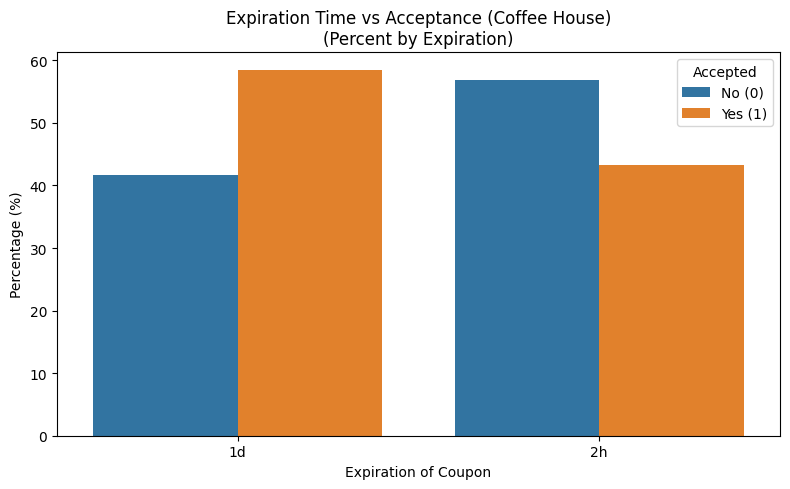

In [324]:
# Expiration vs Acceptance within Coffee House
# plt.figure(figsize=(8, 5))
# sns.countplot(x='expiration', hue='Y', data=coffee_df)
# plt.title('Expiration Time vs Acceptance (Coffee House)')
# plt.xlabel('Expiration of Coupon')
# plt.ylabel('Count')
# plt.legend(title='Accepted', labels=['No (0)', 'Yes (1)'])
# plt.tight_layout()
# plt.show()

exp_counts = (
    coffee_df
    .groupby(['expiration', 'Y'])
    .size()
    .reset_index(name='count')
)

exp_counts['percent'] = (
    exp_counts
    .groupby('expiration')['count']
    .transform(lambda x: x / x.sum() * 100)
)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=exp_counts,
    x='expiration',
    y='percent',
    hue='Y'
)

# This is needed to use the existing handles (colored boxes) and ignore the old labels
handles, _ = ax.get_legend_handles_labels()
ax.legend(
    handles=handles,
    labels=['No (0)', 'Yes (1)'], 
    title='Accepted'
)

plt.title('Expiration Time vs Acceptance (Coffee House)\n(Percent by Expiration)')
plt.xlabel('Expiration of Coupon')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

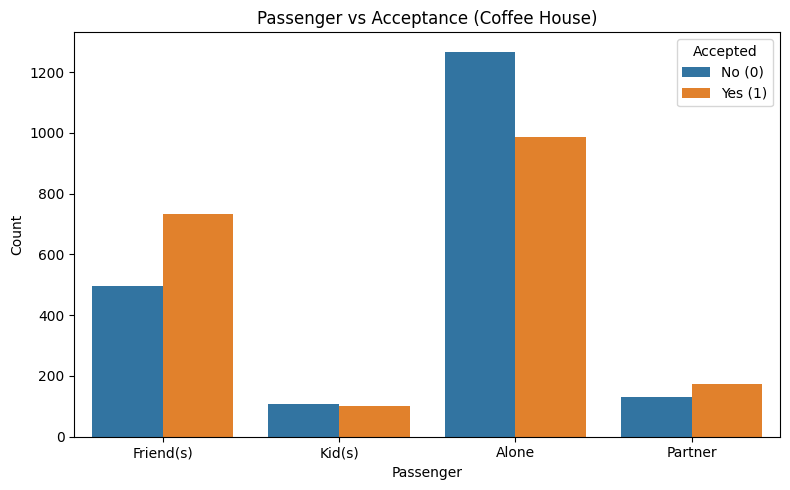

In [325]:
# Passenger vs Acceptance within Coffee House
plt.figure(figsize=(8, 5))
sns.countplot(x='passanger', hue='Y', data=coffee_df)
plt.title('Passenger vs Acceptance (Coffee House)')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.legend(title='Accepted', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

## Findings
- Coffee House coupons have a high acceptance rate of 49.92%.
- Acceptance varies by passenger type: solo drivers accept more frequently.
- Shorter expiration (2h) leads to quicker acceptance within this group.

## Next Steps
- Build predictive models to formalize these relationships.
- Explore other coupon types with similar deep dives.
